In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_excel(r'C:/Users/yvams/Desktop/projects_mech/Concrete_Data.xls')

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
# look at the statistics of the data
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Clean the data by removing outliers

In [5]:
# remove outliers more than 1.5 * the IQR
q1 = data.quantile(.25)
q3 = data.quantile(.75)

iqr = q3 - q1
outliers = ((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)
data_clean = data[~outliers]
data_clean.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,275.763071,73.860414,58.018491,180.617322,6.245595,974.807917,776.550053,32.376196,34.887534
std,101.888595,86.357628,64.363194,18.749758,5.340507,77.646438,75.074455,28.558690,16.592494
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.900000,0.000000,932.000000,741.000000,7.000000,22.629981
50%,255.500000,20.000000,0.000000,183.800000,7.000000,968.000000,780.000000,28.000000,33.398217
75%,349.000000,145.000000,118.310000,192.000000,10.300000,1031.000000,822.200000,28.000000,44.636676
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,120.000000,79.400056


In [6]:
# separate predictor and response variables
predictors = data_clean.iloc[:,:-1]
response = data_clean.iloc[:,-1]

predictors.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


# Normalize the data using the Z-score approach 

In [7]:
# normalize the data using the Z-scale approach
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(predictors)
predictors_scaled = scaler.transform(predictors)
predictors_scaled = pd.DataFrame(predictors_scaled, columns=predictors.columns)

# look at the statistics of the data to ensure it was normalized
predictors_scaled.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,9.410000e+02,9.410000e+02,9.410000e+02,9.410000e+02,9.410000e+02,9.410000e+02,9.410000e+02,9.410000e+02
mean,-1.763851e-17,6.241318e-16,9.276438e-16,8.405132e-16,8.021686e-16,1.894812e-16,-1.888618e-16,7.149789e-16
std,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00,1.000532e+00
min,-1.706329e+00,-8.557402e-01,-9.019028e-01,-2.861148e+00,-1.170098e+00,-2.239644e+00,-2.432880e+00,-1.099241e+00
25%,-8.388426e-01,-8.557402e-01,-9.019028e-01,-8.387137e-01,-1.170098e+00,-5.516117e-01,-4.737824e-01,-8.890355e-01
50%,-1.989805e-01,-6.240220e-01,-9.019028e-01,1.698353e-01,1.413360e-01,-8.772505e-02,4.597811e-02,-1.533167e-01
75%,7.191764e-01,8.242169e-01,9.372371e-01,6.074068e-01,7.595835e-01,7.240765e-01,6.083857e-01,-1.533167e-01
max,2.594770e+00,3.107800e+00,2.208670e+00,2.528453e+00,2.970287e+00,2.193051e+00,2.244965e+00,3.069833e+00


In [8]:
response.head()

1    61.887366
5    47.029847
7    36.447770
8    45.854291
9    39.289790
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

# Use an 80/20 split for training and test data sets.

In [9]:
# split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2)
print(x_train.shape, x_test.shape)

(752, 8) (189, 8)


# Develop Lasso and Ridge Regression models. For each model, assume different values for the penalty parameter (from small values to high values) and study the effect that these values have on feature selection. 

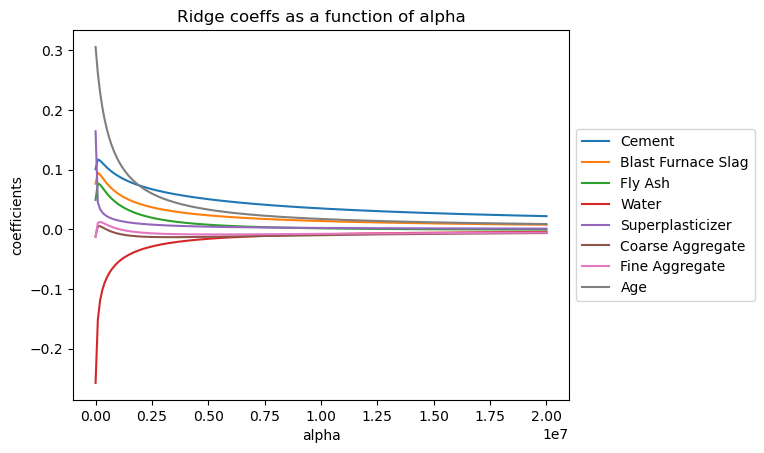

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

c_names = [c[:c.find(' (')].strip() for c in x_train.columns]

# list of hyperparameter values to use for lambda/alpha
alphas = np.linspace(0, 2e7, 200)
coefs = []
scores = []

# train a Ridge regression model using different values for alpha
for a in alphas:
  rr = Ridge(alpha=a)
  rr.fit(x_train, y_train)
  coefs.append(rr.coef_)
  rr_pred = rr.predict(x_test)
  rr_r2 = r2_score(rr_pred, y_test)
  scores.append(rr_r2)

# visualize the results of the coefficients changing as a function of alpha
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coeffs as a function of alpha')
plt.axis('tight')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(c_names, loc='center left', bbox_to_anchor=(1.0, 0.5))

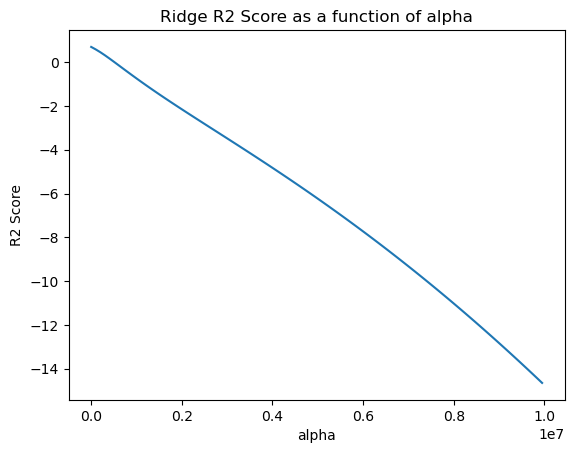

In [11]:
# visualize the first 100 results of the R2 score changing as a function of alpha
ax = plt.gca()
ax.plot(alphas[:100], scores[:100])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title('Ridge R2 Score as a function of alpha')
plt.axis('tight')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

C:\Users\yvams\AppData\Local\Temp\ipykernel_29212\2316628856.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lr.fit(x_train, y_train)
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+04, tolerance: 2.070e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


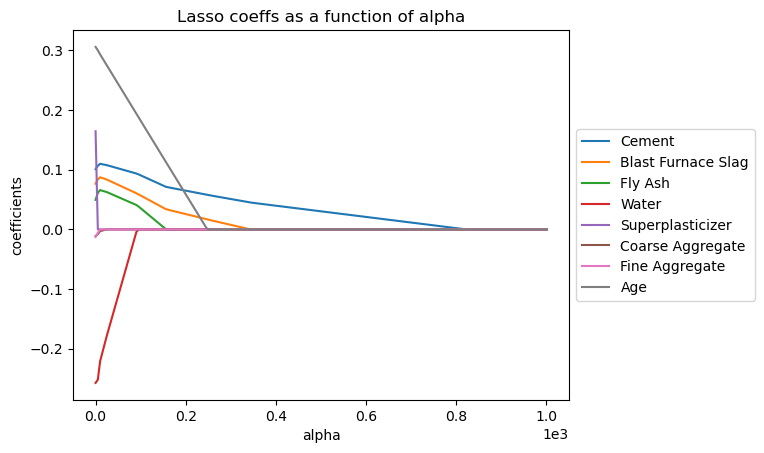

In [12]:
from sklearn.linear_model import Lasso

# list of hyperparameter values to use for lambda/alpha
alphas = np.linspace(0, 1000, 200)
coefs = []
scores = []

# train a Lasso regression model using different values for alpha
for a in alphas:
  lr = Lasso(alpha=a)
  lr.fit(x_train, y_train)
  coefs.append(lr.coef_)
  lr_pred = lr.predict(x_test)
  lr_r2 = r2_score(lr_pred, y_test)
  scores.append(lr_r2)

# visualize the results of the coefficients changing as a function of alpha
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coeffs as a function of alpha')
plt.axis('tight')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(c_names, loc='center left', bbox_to_anchor=(1.0, 0.5))

(-2.261306532663317, 47.48743718592966, 0.4018544381504393, 0.7080797081866284)

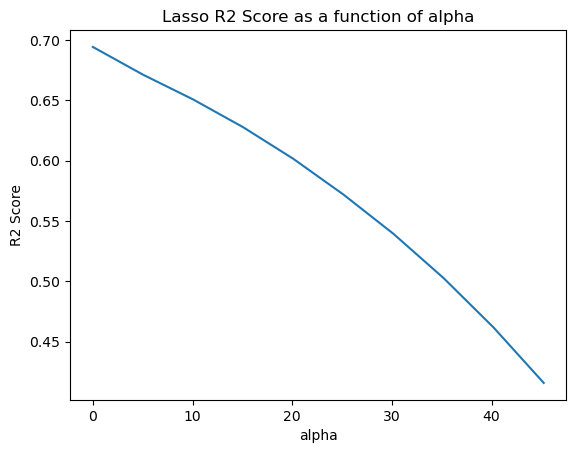

In [13]:
# visualize the first 10 results of the R2 score changing as a function of alpha
ax = plt.gca()
ax.plot(alphas[:10], scores[:10])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title('Lasso R2 Score as a function of alpha')
plt.axis('tight')

Lasso and Ridge regression are a form of regularization used to better fit models to data under specific circumstances. A penalty parameter related to the weights is added to the cost function. This has the effect of shrinking the coefficients on input features. L2 regularization or ridge regression uses a penalty term that is the sum of the square of the weights, whereas L1 regularization or Lasso regression uses just the sum of the absolute values of the weights. L1 and L2 are also known as the L1 and L2 norm of a vector.

The primary method in which Ridge and Lasso regression work is by preventing overfitting on the data by using the penalty parameter to introduce bias into the model in exchange for a lower model variance. A simple example might be where you fit a perfect line between two points using two data points from a set of training data, but when you introduce test data later the model performs poorly. The model needs a balance between bias and variance to perform well and Ridge/Lasso regression allows this to happen.

Ridge regression shrinks larger coefficients faster because of the square terms, whereas Lasso regression shrinks all coefficients equally. Lasso regression actually has the unique ability to shrink all coefficients completely to 0.

Some advantages of Ridge and Lasso regression include the ability to shrink coefficients on highly correlated features or fit a model when the number of features is more than the number of observations or samples.

Disadvantages include being computationally expensive and require a linear relationship between the predictors and response. The developer also needs knowledge of cross validation and choosing the correct alpha parameters to use in the model or else the models can be overfit or underfit.

In ridge regression, none of the hyperparameters (βi) will be zeros. So, we can threshold their estimates by choosing a threshold value. Consider three different threshold values: 10−5, 10−3, and 0.1. For each of these cases,discuss which features become insignificant. Do this for only one value of the penalty parameter. 

(0.0, 0.12)

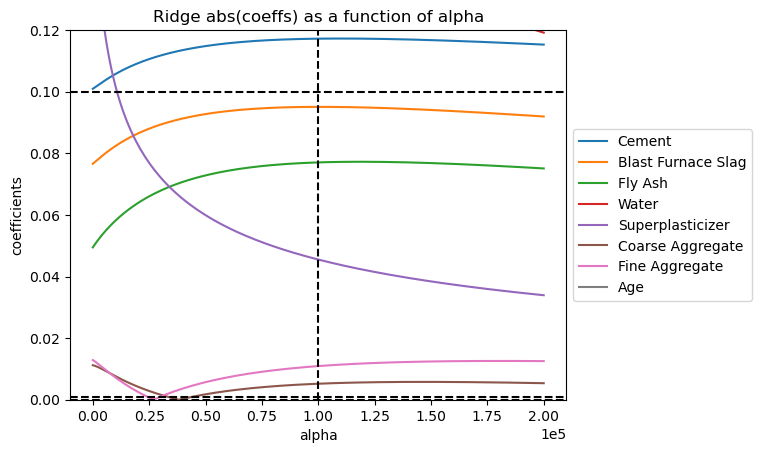

In [14]:
# list of hyperparameter values to use for lambda/alpha
alphas = np.linspace(0, 2e5, 200)
coefs = []
scores = []

# train a Ridge regression model using different values for alpha
for a in alphas:
  rr = Ridge(alpha=a)
  rr.fit(x_train, y_train)
  coefs.append(rr.coef_)
  rr_pred = rr.predict(x_test)
  rr_r2 = r2_score(rr_pred, y_test)
  scores.append(rr_r2)

# visualize the results of the coefficients changing as a function of alpha
ax = plt.gca()
ax.plot(alphas, [abs(e) for e in coefs])
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge abs(coeffs) as a function of alpha')
plt.axis('tight')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(c_names, loc='center left', bbox_to_anchor=(1.0, 0.5))

# specifying horizontal line type
plt.axhline(y = 10**-5, color = 'k', linestyle = '--')
plt.axhline(y = 10**-3, color = 'k', linestyle = '--')
plt.axhline(y = .1, color = 'k', linestyle = '--')
plt.axvline(x = 1e5, color = 'k', linestyle = '--')

plt.ylim(0, .12)

If we look specifically at alpha = 1e5 then we can see from the above plot that Superplasticizer, Blast Furnace Slag, Fly Ash, Coarse Aggregate, and Fine Aggregate are all below our threshold of 0.1. Which means Cement, Water, and Age are the only important features.

For this penalty value of alpha all features are relevant above 10^-5 and 10^-3.

Perform 5-fold cross-validation to choose the penalty parameter for the predictive model based on Lasso Regression.

In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 1, 5, 10, 20, 30, 35,
                        45, 50, 55, 100, 120, 150, 170]}
lr = GridSearchCV(Lasso(), parameters, scoring='r2', cv=5)
lr.fit(x_train, y_train)

print("Best alpha: ", lr.best_params_)
print("Best score: ", lr.best_score_)

C:\Users\yvams\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.946e+04, tolerance: 1.694e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+04, tolerance: 1.627e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\yvams\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+04, toleranc

Best alpha:  {'alpha': 0.01}
Best score:  0.7582311683238407


The best alpha value for our Lasso regression was '0.01' with an R2 score on 5 fold cross validation of '0.758'. This means we introduced a little bias to reduce the variance in our model and get a better performing fit on all of our data.